# Data Cleaning

## The Residential Property Price Register (RPPR) Dataset

In [1]:
# Import various libraries & packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

In [2]:
# Read CSV file into a Data Frame:
df = pd.read_csv('data/precleaned_rppr_ireland.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

In [3]:
# Checking how many rows and columns:
df.shape

(10000, 12)

In [4]:
# Print first 5 rows:
df.head(5)

,Address,Postal_Code,County,Price_euro,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description,Day,Month,Year,DoS_yyyymmdd
0,"NEAMH COTTAGE CARRIGDANGAN, KILMICHAEL, CORK",NaN,Cork,30000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,12,1,2016,2016-01-12
1,"No.5 O'Brien Street, Waterford",NaN,Waterford,7000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,9,9,2010,2010-09-09
2,"CLOGHERANE, LAURAGH, KILLARNEY",NaN,Kerry,170000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,14,3,2018,2018-03-14
3,"27 The Oaks, Frenchpark",NaN,Roscommon,30000.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,30,5,2014,2014-05-30
4,"71 Laurel Grove, Tagoat, Wexford",NaN,Wexford,95000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,26,11,2010,2010-11-26


In [5]:
# Print last 5 rows:
df.tail(5)

,Address,Postal_Code,County,Price_euro,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description,Day,Month,Year,DoS_yyyymmdd
9995,"1 THE GARDENS, CLOGHERHEAD, LOUTH",NaN,Louth,130000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,17,4,2014,2014-04-17
9996,"25 ASSUMPTION RD, ATHLONE, CO WESTMEATH",NaN,Westmeath,138000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,1,8,2019,2019-08-01
9997,"5 CAIRNCOURT, DUNTAHEEN ROAD, FERMOY",NaN,Cork,337000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,13,12,2021,2021-12-13
9998,"117 Ard Ban, Muff",NaN,Donegal,162995.6,No,Yes,New Dwelling house /Apartment,greater than 125 sq metres,5,10,2015,2015-10-05
9999,"76 Hampton Green, Balbriggan",NaN,Dublin,118000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,5,4,2013,2013-04-05


In [6]:
# Check Feature Data Types:
df.dtypes

Address                       object
Postal_Code                   object
County                        object
Price_euro                   float64
Not_Full_Market_Price         object
VAT_Exclusive                 object
Description_of_Property       object
Property_Size_Description     object
Day                            int64
Month                          int64
Year                           int64
DoS_yyyymmdd                  object
dtype: object

In [7]:
# Check the Information of the Columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Address                    10000 non-null  object 
 1   Postal_Code                1914 non-null   object 
 2   County                     10000 non-null  object 
 3   Price_euro                 10000 non-null  float64
 4   Not_Full_Market_Price      10000 non-null  object 
 5   VAT_Exclusive              10000 non-null  object 
 6   Description_of_Property    10000 non-null  object 
 7   Property_Size_Description  1016 non-null   object 
 8   Day                        10000 non-null  int64  
 9   Month                      10000 non-null  int64  
 10  Year                       10000 non-null  int64  
 11  DoS_yyyymmdd               10000 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 937.6+ KB


In [8]:
# Change Data Types:
df['DoS_yyyymmdd'] = df['DoS_yyyymmdd'].astype('datetime64')

df['Address'] = df['Address'].astype('string')

df['Postal_Code'] = df['Postal_Code'].astype('category')
df['County'] = df['County'].astype('category')
df['Not_Full_Market_Price'] = df['Not_Full_Market_Price'].astype('category')
df['VAT_Exclusive'] = df['VAT_Exclusive'].astype('category')
df['Description_of_Property'] = df['Description_of_Property'].astype('category')
df['Property_Size_Description'] = df['Property_Size_Description'].astype('category')

df['Price_euro'] = df['Price_euro'].astype('float64')

df['Day'] = df['Day'].astype('category')
df['Month'] = df['Month'].astype('category')
df['Year'] = df['Year'].astype('category')

df.dtypes

Address                              string
Postal_Code                        category
County                             category
Price_euro                          float64
Not_Full_Market_Price              category
VAT_Exclusive                      category
Description_of_Property            category
Property_Size_Description          category
Day                                category
Month                              category
Year                               category
DoS_yyyymmdd                 datetime64[ns]
dtype: object

In [9]:
df.head(5)

,Address,Postal_Code,County,Price_euro,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description,Day,Month,Year,DoS_yyyymmdd
0,"NEAMH COTTAGE CARRIGDANGAN, KILMICHAEL, CORK",NaN,Cork,30000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,12,1,2016,2016-01-12
1,"No.5 O'Brien Street, Waterford",NaN,Waterford,7000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,9,9,2010,2010-09-09
2,"CLOGHERANE, LAURAGH, KILLARNEY",NaN,Kerry,170000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,14,3,2018,2018-03-14
3,"27 The Oaks, Frenchpark",NaN,Roscommon,30000.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,30,5,2014,2014-05-30
4,"71 Laurel Grove, Tagoat, Wexford",NaN,Wexford,95000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,26,11,2010,2010-11-26


### Summary of Data Cleaning Plan:

| Features                           | Data Quality Issue            | Handling Strategy              |
|------------------------------------|-------------------------------|--------------------------------|
| Postal_Code                        | Missing Values                | Do Nothing                     |
| Postal_Code                        | Mis-labeled                   | Translate & Update             |
| Postal_Code                        | Null Values                   | Do Nothing                     |
| Price_euro                         | Upper Bound Outliers          | Remove 11 Highest(Multi-Unit)  |
| Price_euro                         | Lower Bound Outliers          | Do Nothing                     |
| Description_of_Property            | Mis-labeled                   | Translate & Update             |
| Property_Size_Description          | Mis-labeled                   | Update & Combine               |
| Property_Size_Description          | Null Values                   | Do Nothing                     |

<b>Decsription_of_Property</b>

<AxesSubplot:>

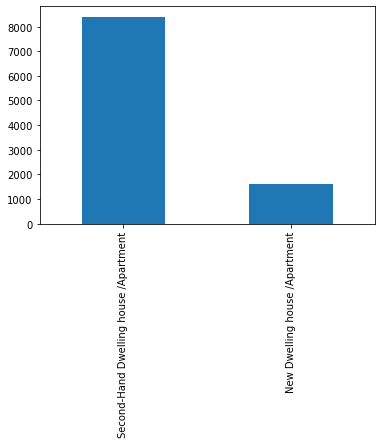

In [12]:
df.Description_of_Property = df.Description_of_Property.str.replace('Teach/Árasán Cónaithe Atháimhe', 'Second-Hand Dwelling house /Apartment')

df['Description_of_Property'].value_counts().plot(kind='bar')

In [13]:
df['Description_of_Property'].count()

10000

<b>Description_Size_Description</b>

<AxesSubplot:>

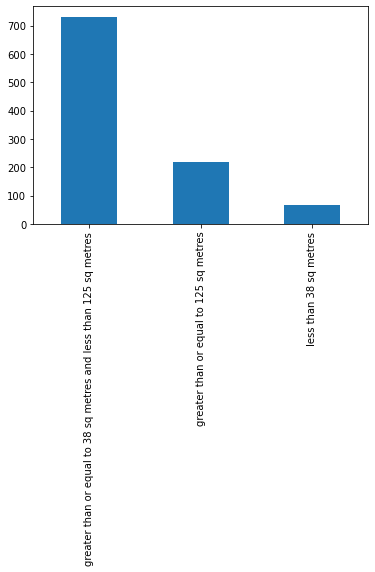

In [14]:
df.Property_Size_Description = df.Property_Size_Description.str.replace('greater than 125 sq metres', 'greater than or equal to 125 sq metres')

df['Property_Size_Description'].value_counts().plot(kind='bar')

In [15]:
df.head(5735)

,Address,Postal_Code,County,Price_euro,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description,Day,Month,Year,DoS_yyyymmdd
0,"NEAMH COTTAGE CARRIGDANGAN, KILMICHAEL, CORK",NaN,Cork,30000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,12,1,2016,2016-01-12
1,"No.5 O'Brien Street, Waterford",NaN,Waterford,7000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,9,9,2010,2010-09-09
2,"CLOGHERANE, LAURAGH, KILLARNEY",NaN,Kerry,170000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,14,3,2018,2018-03-14
3,"27 The Oaks, Frenchpark",NaN,Roscommon,30000.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,30,5,2014,2014-05-30
4,"71 Laurel Grove, Tagoat, Wexford",NaN,Wexford,95000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,26,11,2010,2010-11-26
...,...,...,...,...,...,...,...,...,...,...,...,...
5730,"17 MAIN ST, RATHDRUM, MAIN ST",NaN,Wicklow,125000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,21,12,2018,2018-12-21
5731,"8 ST JOHNS GREEN, CLONDALKIN, DUBLIN 22",Dublin 22,Dublin,260000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,3,6,2021,2021-06-03
5732,"72 Cooline Drive, Ballyvoloon, Cobh",NaN,Cork,209000.0,No,Yes,New Dwelling house /Apartment,NaN,29,7,2019,2019-07-29
5733,"7 Thorndale Grove, Artane, Dublin.",Baile Átha Cliath 5,Dublin,250000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,28,6,2012,2012-06-28


<b>Postal_Code</b>

<AxesSubplot:>

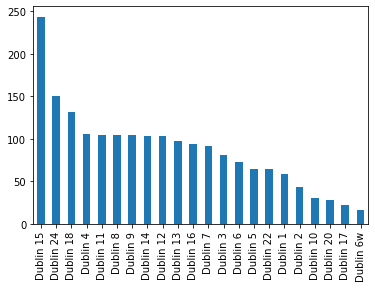

In [16]:
df.Postal_Code = df.Postal_Code.str.replace('Baile Átha Cliath 5', 'Dublin 5')

df['Postal_Code'].value_counts().plot(kind='bar')

<b>Price_euro</b>

In [17]:
df_sorted = df.sort_values(by=['Price_euro'])
df_sorted

,Address,Postal_Code,County,Price_euro,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description,Day,Month,Year,DoS_yyyymmdd
9967,"1 ANNE ST, CORK",NaN,Cork,5715.0,No,No,Second-Hand Dwelling house /Apartment,NaN,20,12,2017,2017-12-20
3923,"15 INNISMORE, CRUMLIN VILLAGE, DUBLIN 12",Dublin 12,Dublin,6000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN,1,2,2018,2018-02-01
2040,"14 Chapel Farm, Lusk",NaN,Dublin,6000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN,15,3,2010,2010-03-15
5830,"94B RATOATH AVE, FINGLAS, DUBLIN 11",Dublin 11,Dublin,6250.0,No,No,Second-Hand Dwelling house /Apartment,NaN,9,12,2013,2013-12-09
4650,"Parade Field, Chapel Street, Bantry",NaN,Cork,6500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,16,8,2012,2012-08-16
...,...,...,...,...,...,...,...,...,...,...,...,...
344,"Block 2, Main Street, Clongriffin",Dublin 13,Dublin,20925110.0,No,Yes,New Dwelling house /Apartment,NaN,30,8,2019,2019-08-30
9873,"1 WOLFE TONE LOFTS, WOLFE TONE ST, DUBLIN 1",Dublin 1,Dublin,22008000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,30,1,2019,2019-01-30
4784,"Apartments 1-80 Dundrum View, Dundrum, Dublin 14",Dublin 14,Dublin,28050000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,25,6,2015,2015-06-25
5418,"Block F K and L Central Park, Leopardstown",Dublin 18,Dublin,86365000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,24,7,2014,2014-07-24


After sorting and looking at the last five (highest priced) properties, it is clear to see that they are mulit-unit and extremely highly priced.  Due to these being such drastic outliers and not single home properties, I will drop these five properties as they will greatly increase the noise of the data.

In [18]:
df_sorted.drop(df_sorted.tail(5).index, inplace = True)
df_sorted

,Address,Postal_Code,County,Price_euro,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description,Day,Month,Year,DoS_yyyymmdd
9967,"1 ANNE ST, CORK",NaN,Cork,5715.00,No,No,Second-Hand Dwelling house /Apartment,NaN,20,12,2017,2017-12-20
3923,"15 INNISMORE, CRUMLIN VILLAGE, DUBLIN 12",Dublin 12,Dublin,6000.00,Yes,No,Second-Hand Dwelling house /Apartment,NaN,1,2,2018,2018-02-01
2040,"14 Chapel Farm, Lusk",NaN,Dublin,6000.00,Yes,No,Second-Hand Dwelling house /Apartment,NaN,15,3,2010,2010-03-15
5830,"94B RATOATH AVE, FINGLAS, DUBLIN 11",Dublin 11,Dublin,6250.00,No,No,Second-Hand Dwelling house /Apartment,NaN,9,12,2013,2013-12-09
4650,"Parade Field, Chapel Street, Bantry",NaN,Cork,6500.00,No,No,Second-Hand Dwelling house /Apartment,NaN,16,8,2012,2012-08-16
...,...,...,...,...,...,...,...,...,...,...,...,...
4790,"Boystown House and Estate, Blessington",NaN,Wicklow,6350000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,9,2,2015,2015-02-09
3189,"Units 1-24, Gandon Hall, Gandon Park",NaN,Dublin,7405286.34,No,Yes,New Dwelling house /Apartment,NaN,9,9,2020,2020-09-09
401,"1-4 & 17 Maudelin's Brook, 1 1a 2 2a 3-6 7 7a ...",NaN,Meath,7704845.81,No,Yes,New Dwelling house /Apartment,NaN,27,4,2021,2021-04-27
6526,"2 5 6 9-11 13 15 19 22-24 26 31 32, 34 36 39 4...",Dublin 24,Dublin,9000000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,29,10,2019,2019-10-29


The next five fit the same criteria, so I will remove these five rows as well.

In [19]:
df_sorted.drop(df_sorted.tail(5).index, inplace = True)
df_sorted

,Address,Postal_Code,County,Price_euro,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description,Day,Month,Year,DoS_yyyymmdd
9967,"1 ANNE ST, CORK",NaN,Cork,5715.0,No,No,Second-Hand Dwelling house /Apartment,NaN,20,12,2017,2017-12-20
3923,"15 INNISMORE, CRUMLIN VILLAGE, DUBLIN 12",Dublin 12,Dublin,6000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN,1,2,2018,2018-02-01
2040,"14 Chapel Farm, Lusk",NaN,Dublin,6000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN,15,3,2010,2010-03-15
5830,"94B RATOATH AVE, FINGLAS, DUBLIN 11",Dublin 11,Dublin,6250.0,No,No,Second-Hand Dwelling house /Apartment,NaN,9,12,2013,2013-12-09
4650,"Parade Field, Chapel Street, Bantry",NaN,Cork,6500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,16,8,2012,2012-08-16
...,...,...,...,...,...,...,...,...,...,...,...,...
9183,"Abington Wood, Malahide, Co Dublin",NaN,Dublin,4655000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,27,4,2015,2015-04-27
9383,"LADYWELL, CORRYBEG, TEMPLEOGUE",Dublin 6w,Dublin,4800000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,16,8,2016,2016-08-16
4795,"12 OAKLEY RD, RANELAGH, DUBLIN 6",Dublin 6,Dublin,4935000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,12,12,2019,2019-12-12
6061,"APT 1, 138A SANDFORD RD, DUBLIN",Dublin 6,Dublin,5180000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,29,11,2019,2019-11-29


Finally, just this last mulit-unit property.

In [20]:
df_sorted.drop(df_sorted.tail(1).index, inplace = True)
df_sorted

,Address,Postal_Code,County,Price_euro,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description,Day,Month,Year,DoS_yyyymmdd
9967,"1 ANNE ST, CORK",NaN,Cork,5715.00,No,No,Second-Hand Dwelling house /Apartment,NaN,20,12,2017,2017-12-20
3923,"15 INNISMORE, CRUMLIN VILLAGE, DUBLIN 12",Dublin 12,Dublin,6000.00,Yes,No,Second-Hand Dwelling house /Apartment,NaN,1,2,2018,2018-02-01
2040,"14 Chapel Farm, Lusk",NaN,Dublin,6000.00,Yes,No,Second-Hand Dwelling house /Apartment,NaN,15,3,2010,2010-03-15
5830,"94B RATOATH AVE, FINGLAS, DUBLIN 11",Dublin 11,Dublin,6250.00,No,No,Second-Hand Dwelling house /Apartment,NaN,9,12,2013,2013-12-09
4650,"Parade Field, Chapel Street, Bantry",NaN,Cork,6500.00,No,No,Second-Hand Dwelling house /Apartment,NaN,16,8,2012,2012-08-16
...,...,...,...,...,...,...,...,...,...,...,...,...
7514,"172-186 (inclusive), Caireal Mor, Headford Road",NaN,Galway,4229391.18,No,Yes,New Dwelling house /Apartment,NaN,31,7,2020,2020-07-31
9183,"Abington Wood, Malahide, Co Dublin",NaN,Dublin,4655000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,27,4,2015,2015-04-27
9383,"LADYWELL, CORRYBEG, TEMPLEOGUE",Dublin 6w,Dublin,4800000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,16,8,2016,2016-08-16
4795,"12 OAKLEY RD, RANELAGH, DUBLIN 6",Dublin 6,Dublin,4935000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,12,12,2019,2019-12-12


As for the lower outliers, after research they are poperties that a normal (non-developer) individual may purchase.  So, I will keep them.

<AxesSubplot:>

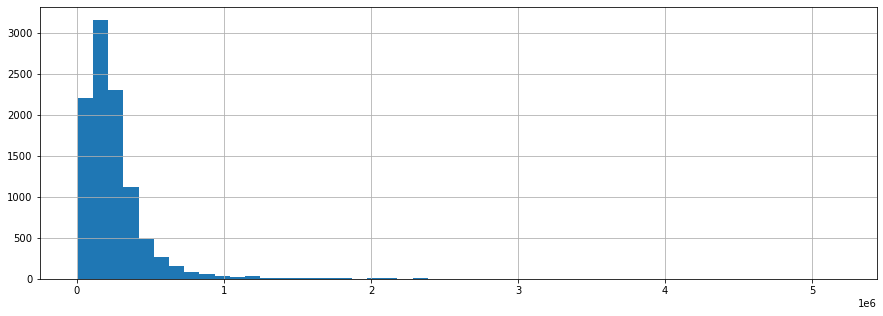

In [21]:
df_sorted.Price_euro.hist(figsize=(15,5), bins=50)

<AxesSubplot:>

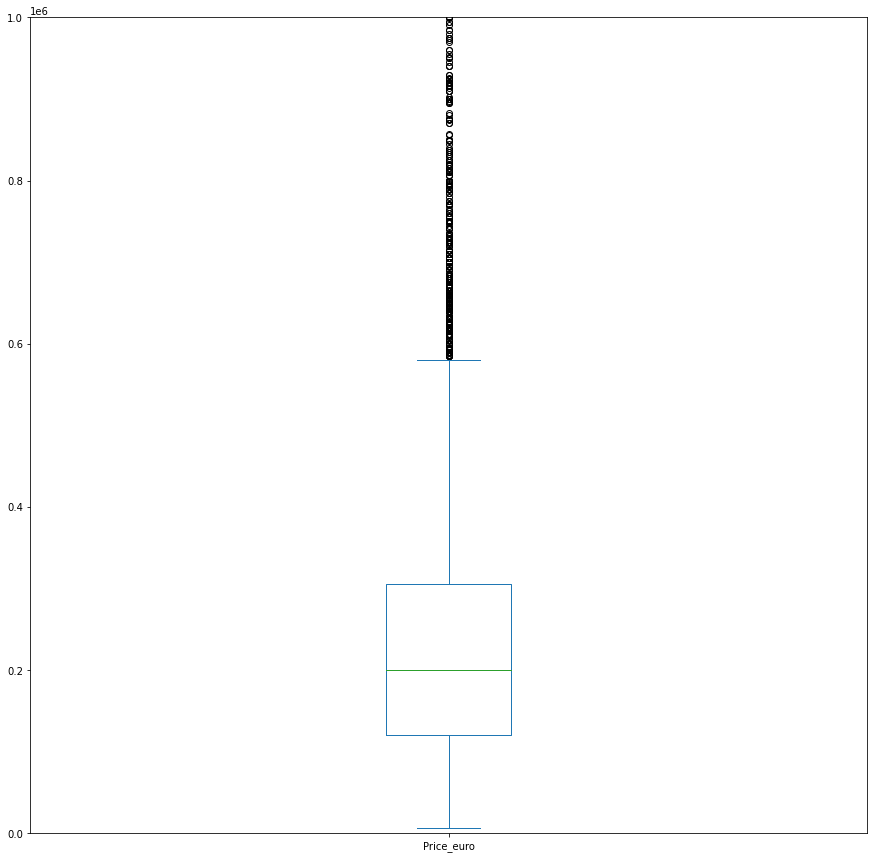

In [22]:
# Box Plot with Y max of 1,000,000 euro (to better visualize the interquartile range)
df_sorted.Price_euro.plot(kind='box', figsize=(15,15), ylim=(0,1000000))

In [23]:
# Send cleaned rppr df to csv:
df_sorted.to_csv('data/cleaned_rppr_ireland.csv', index=False)

# Central Statistics Office - Income Data

## Income Per Person & Income Indices

New features:
I did add features starting in Part 1 for components of Date of Sale: Day (of Month 1-31), Month (of Year 1-12), Year.  These will all be useful in studying sales trends.
Additionally, I searched the Central Statistics Office provided by the government of Ireland, looking for some markers of income to then compare to price.  I was able to find Income Per Person and Income Indices by County by Year for 2010-2019.  These were provided on a csv, which I will merge with the data set.  I recognize that it is not the actual income for each buyer of each sale, but a general estimate for the county and year should provide more visibility into the relationship of price vs. income while still allowing data privacy for each buyer.
https://www.cso.ie/en/releasesandpublications/er/cirgdp/countyincomesandregionalgdp2019/

In [29]:
# Read External CSV file into a Data Frame:
df_external = pd.read_csv('data/raw/County_Income_Stats.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)
df_external.head()

,Year,County,Income_Indices,Income_Per_Person_euro
0,2010,Cavan,92.050586,23457.19974
1,2010,Donegal,77.784839,19821.86722
2,2010,Leitrim,94.475404,24075.11476
3,2010,Monaghan,81.498702,20768.26896
4,2010,Sligo,90.791748,23136.41077


In [31]:
df_merge = pd.merge(df_sorted, df_external, on=['Year', 'County'], how='left')
df_merge

,Address,Postal_Code,County,Price_euro,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description,Day,Month,Year,DoS_yyyymmdd,Income_Indices,Income_Per_Person_euro
0,"1 ANNE ST, CORK",NaN,Cork,5715.00,No,No,Second-Hand Dwelling house /Apartment,NaN,20,12,2017,2017-12-20,98.943012,29293.89683
1,"15 INNISMORE, CRUMLIN VILLAGE, DUBLIN 12",Dublin 12,Dublin,6000.00,Yes,No,Second-Hand Dwelling house /Apartment,NaN,1,2,2018,2018-02-01,122.341731,37406.12892
2,"14 Chapel Farm, Lusk",NaN,Dublin,6000.00,Yes,No,Second-Hand Dwelling house /Apartment,NaN,15,3,2010,2010-03-15,114.683825,29224.81553
3,"94B RATOATH AVE, FINGLAS, DUBLIN 11",Dublin 11,Dublin,6250.00,No,No,Second-Hand Dwelling house /Apartment,NaN,9,12,2013,2013-12-09,120.059108,30843.61949
4,"Parade Field, Chapel Street, Bantry",NaN,Cork,6500.00,No,No,Second-Hand Dwelling house /Apartment,NaN,16,8,2012,2012-08-16,99.684309,25832.86283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,"172-186 (inclusive), Caireal Mor, Headford Road",NaN,Galway,4229391.18,No,Yes,New Dwelling house /Apartment,NaN,31,7,2020,2020-07-31,89.612514,29161.30477
9985,"Abington Wood, Malahide, Co Dublin",NaN,Dublin,4655000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,27,4,2015,2015-04-27,121.386047,32997.87569
9986,"LADYWELL, CORRYBEG, TEMPLEOGUE",Dublin 6w,Dublin,4800000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,16,8,2016,2016-08-16,121.972926,34144.23583
9987,"12 OAKLEY RD, RANELAGH, DUBLIN 6",Dublin 6,Dublin,4935000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,12,12,2019,2019-12-12,122.290137,38902.81574


In [33]:
df_merge.isnull().sum()

Address                         0
Postal_Code                  8081
County                          0
Price_euro                      0
Not_Full_Market_Price           0
VAT_Exclusive                   0
Description_of_Property         0
Property_Size_Description    8973
Day                             0
Month                           0
Year                            0
DoS_yyyymmdd                    0
Income_Indices                  0
Income_Per_Person_euro          0
dtype: int64

In [34]:
df_merge.dtypes

Address                              string
Postal_Code                          object
County                               object
Price_euro                          float64
Not_Full_Market_Price              category
VAT_Exclusive                      category
Description_of_Property              object
Property_Size_Description            object
Day                                category
Month                              category
Year                                  int64
DoS_yyyymmdd                 datetime64[ns]
Income_Indices                      float64
Income_Per_Person_euro              float64
dtype: object

In [37]:
# Send rppr/income df to csv:
df_merge.to_csv('data/final/rppr_income.csv', index=False)

### Data Exploration continued in 'data_explore.ipynb'